<a href="https://colab.research.google.com/github/Kubania/Application-of-the-KNN-and-Naive-Bayes-Algorithms/blob/master/Moringa_Core_Week_9_IP_Mercy_Kubania_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Spam-Filter

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

This is a  collection of spam e-mails came from the creators of the dataset postmaster and individuals who had filed spam. The collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter.

## 1. Defining the Question

### a) Specifying the Question



1.  Build a model that can classify if an email is a spam or it is not







### b) Defining the Metric for Success

Build a model that is able to determine if an email received is a spam or not with an accuracy that is above 75%


### c) Understanding the context


Research is based on colletion of emails from individuals who have filed the emails recieved as spam and non-spam are a collection of both work and personal emails. 

### d) Recording the Experimental Design




1.   Import Libraries
2.   Load the Dataset
3.   Data Cleaning
4.   EDA
5.   Modelling
6.   Evaluation of the Models



## 2. Reading the Data

In [1]:
# Loading the Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
spam = pd.read_csv('/content/spambase_csv.csv')

## 3. Checking the Data

In [3]:
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
spam.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [5]:
spam.shape

(4601, 58)

In [6]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

## 5. Tidying the Dataset

In [7]:
# Check for null
spam.isnull().any()

word_freq_make                False
word_freq_address             False
word_freq_all                 False
word_freq_3d                  False
word_freq_our                 False
word_freq_over                False
word_freq_remove              False
word_freq_internet            False
word_freq_order               False
word_freq_mail                False
word_freq_receive             False
word_freq_will                False
word_freq_people              False
word_freq_report              False
word_freq_addresses           False
word_freq_free                False
word_freq_business            False
word_freq_email               False
word_freq_you                 False
word_freq_credit              False
word_freq_your                False
word_freq_font                False
word_freq_000                 False
word_freq_money               False
word_freq_hp                  False
word_freq_hpl                 False
word_freq_george              False
word_freq_650               

In [8]:
# Check for number of zeros in each column
(spam == 0).sum()

word_freq_make                3548
word_freq_address             3703
word_freq_all                 2713
word_freq_3d                  4554
word_freq_our                 2853
word_freq_over                3602
word_freq_remove              3794
word_freq_internet            3777
word_freq_order               3828
word_freq_mail                3299
word_freq_receive             3892
word_freq_will                2276
word_freq_people              3749
word_freq_report              4244
word_freq_addresses           4265
word_freq_free                3360
word_freq_business            3638
word_freq_email               3563
word_freq_you                 1374
word_freq_credit              4177
word_freq_your                2178
word_freq_font                4484
word_freq_000                 3922
word_freq_money               3866
word_freq_hp                  3511
word_freq_hpl                 3790
word_freq_george              3821
word_freq_650                 4138
word_freq_lab       

In [9]:
# Checking for Anomalies

#Drop columns with only a single value

for col in spam.columns:
    if spam[col].nunique() == 1:
        spam = spam.drop(col, axis=1)
spam.shape

(4601, 58)

In [10]:
# Check for Duplicates
spam.duplicated().any()

True

In [11]:
spam.drop_duplicates(inplace=True)
spam.shape

(4210, 58)

In [12]:
# Check for outliers

# function that detects outliers
def detect_outlier(data_1):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

# Counting of outliers
for col in spam.columns:
    rows, columns = spam.shape
    outliers = detect_outlier(spam[col])
    outliers_count = len(outliers)
    outliers_percentage = (outliers_count/rows)*100
    print(f"{col} has {outliers_count} outliers in total, which is {outliers_percentage:.2}% of data \n")

word_freq_make has 80 outliers in total, which is 1.9% of data 

word_freq_address has 53 outliers in total, which is 1.3% of data 

word_freq_all has 85 outliers in total, which is 2.0% of data 

word_freq_3d has 12 outliers in total, which is 0.29% of data 

word_freq_our has 74 outliers in total, which is 1.8% of data 

word_freq_over has 94 outliers in total, which is 2.2% of data 

word_freq_remove has 90 outliers in total, which is 2.1% of data 

word_freq_internet has 70 outliers in total, which is 1.7% of data 

word_freq_order has 100 outliers in total, which is 2.4% of data 

word_freq_mail has 68 outliers in total, which is 1.6% of data 

word_freq_receive has 102 outliers in total, which is 2.4% of data 

word_freq_will has 97 outliers in total, which is 2.3% of data 

word_freq_people has 80 outliers in total, which is 1.9% of data 

word_freq_report has 95 outliers in total, which is 2.3% of data 

word_freq_addresses has 83 outliers in total, which is 2.0% of data 

word

In [13]:
# Drop Outliers
q3 = spam.quantile(0.75)
q1 = spam.quantile(0.25)

iqr = q3-q1

spam_outliers = spam[~((spam < (q1 - 1.5 * iqr)) |(spam > (q3 + 1.5 * iqr))).any(axis=1)]

In [14]:
print(spam.shape)
print(spam_outliers.shape)

(4210, 58)
(114, 58)


**Conclusion** 

This dataset has **4601 records with 58 columns**. This is a huge dataset and it doesn't have missing values, although it has duplicated values that reduce it **4210 records and 58 columns**.

The dataset has no anomalies, the number of zeros in each column are conistently high in all columns except for two and there is only one nominal column that is **class**

The dataset has outliers and if they were to be removed we would have **144 records and 58 columns**, this might affect our model's performance thus dataset without outliers will  not be used for now

In [15]:
# Import the clean Dataset
spam.to_csv("spam_new.csv")

## 6. Exploratory Analysis

In [16]:
# Load clean Dataset
data = pd.read_csv('spam_new.csv')

data.drop(['Unnamed: 0'], 1, inplace=True)
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### **Univarite Analysis**

([<matplotlib.axis.XTick at 0x7f30fffdc710>,
 [Text(0, 0, 'non-spam'), Text(0, 0, 'spam')])

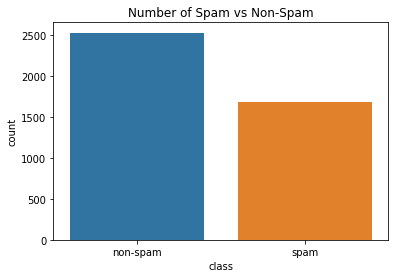

In [17]:
# Distribution of Class

sns.countplot(data['class'])
plt.title("Number of Spam vs Non-Spam")
plt.xticks(ticks=[0,1],labels=['non-spam','spam'])

**Description**

In [18]:
#Description of the numeric data

des = data.describe()
des.loc['IQR'] = des.loc['75%'] - des.loc['25%'] 
# appending interquartile range instead of recalculating it
des = des.append(data.reindex(des.columns, axis=1).agg(['skew', 'kurt']))
des

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,0.056686,0.565204,0.097656,0.061211,0.044803,0.253829,0.149154,0.188755,1.718368,0.084962,0.810040,0.131587,0.100622,0.090969,0.573995,0.279330,0.369838,0.128575,0.098382,0.103779,0.063544,0.044917,0.102333,0.045777,0.107881,0.099368,0.143482,0.014190,0.084057,0.061278,0.041432,0.141542,0.048772,0.085266,0.320124,0.189375,0.005786,0.034746,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,0.184167,0.882513,0.309309,0.346066,0.242186,0.797534,0.457669,0.541133,1.768760,0.505583,1.149352,1.071258,0.351336,0.431723,1.676539,0.905553,1.775330,0.535429,0.576796,0.439568,0.387267,0.300748,0.569146,0.301812,0.530263,0.386470,0.424508,0.230512,0.447991,0.319520,0.318177,0.793803,0.231871,0.646096,1.045914,0.928308,0.079170,0.298521,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

### **Bivariate Analysis**

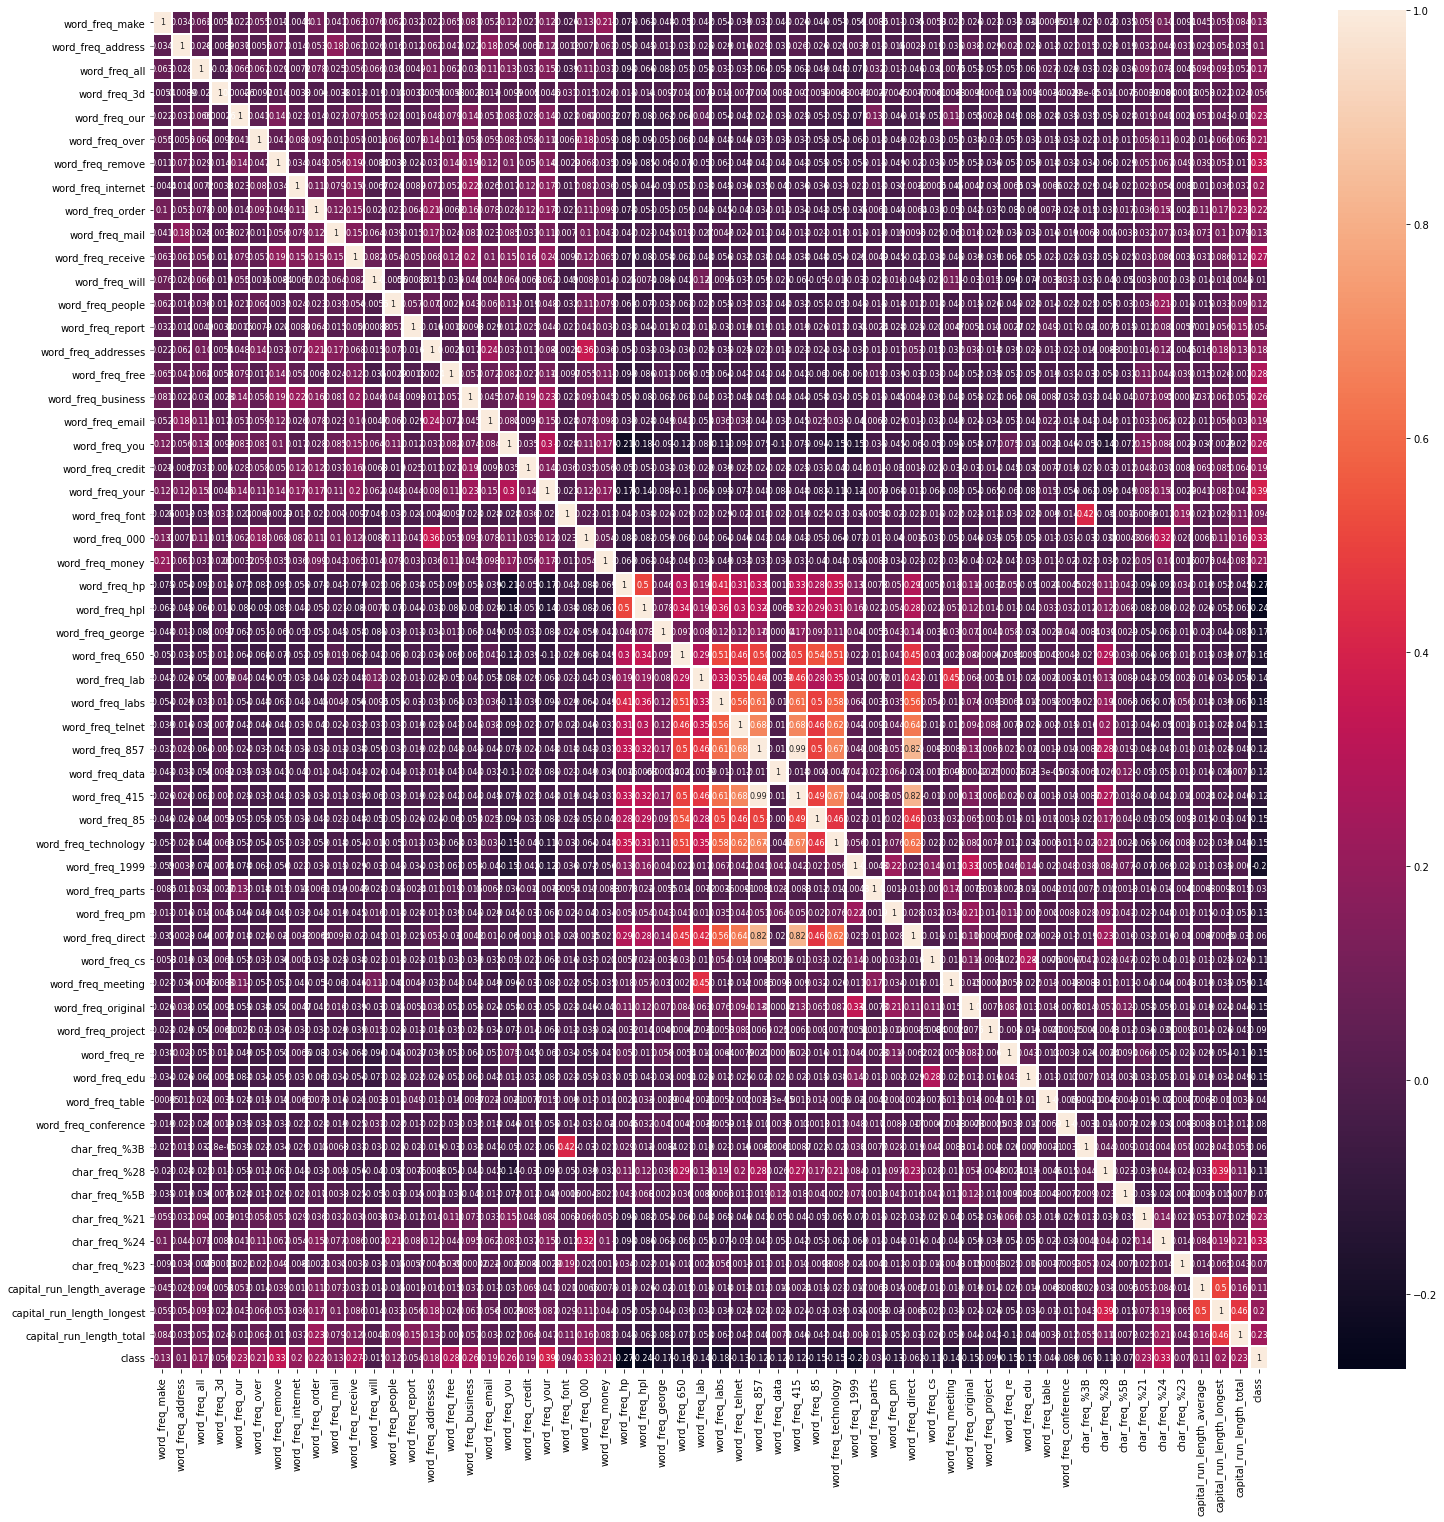

In [19]:
# A heatmap to show correlation

plt.figure(figsize=(25,25))         # Sample figsize in inches
sns.heatmap(data.corr(), annot=True, linewidths=1.5,annot_kws={'size':8})

**Conclusion**

From the Analysis we see that we have more non-spam and than emails. It is difficult to plot frequency tables for 58 columns but from the description of the data we see that alot of the columns have most of their values being 0.
Most columns are positively skewed except for the class column which almost normally distributed

From the heatmap we see that the columns **between word_freq_lab to word_freq_technology have correlation** have strong correlation among each other

**capital_run_length_average**has a moderate correlation with **capital_run_length_longest** while it  **capital_run_length_longest** has a correlation with **capital_run_length_total**

Class has weak correlations with all columns



## 7. Implementing the Solution

In [20]:
# Libraries to Implement the Solution
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix,classification_report

In [21]:
# Split Features and Labels into train and test
X = data.iloc[:,:-1]
y = data['class']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [22]:
#Fit the Model
gb = GaussianNB()
gb.fit(X_train,y_train)

# Make Prediction
y_pred = gb.predict(X_test)


In [23]:
# Evaluate the Model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[365 118]
 [ 11 348]]
              precision    recall  f1-score   support

           0       0.97      0.76      0.85       483
           1       0.75      0.97      0.84       359

    accuracy                           0.85       842
   macro avg       0.86      0.86      0.85       842
weighted avg       0.88      0.85      0.85       842



**Split 70-30**

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=42)

#Fit the Model
gb.fit(X_train,y_train)

# Make Prediction
y_pred = gb.predict(X_test)

# Evaluate the Model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[553 187]
 [ 20 503]]
              precision    recall  f1-score   support

           0       0.97      0.75      0.84       740
           1       0.73      0.96      0.83       523

    accuracy                           0.84      1263
   macro avg       0.85      0.85      0.84      1263
weighted avg       0.87      0.84      0.84      1263



**Split 60-40**

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.4,random_state=42)

#Fit the Model
gb.fit(X_train,y_train)

# Make Prediction
y_pred = gb.predict(X_test)

# Evaluate the Model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[738 250]
 [ 39 657]]
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       988
           1       0.72      0.94      0.82       696

    accuracy                           0.83      1684
   macro avg       0.84      0.85      0.83      1684
weighted avg       0.86      0.83      0.83      1684



**Conclusion:**

From the different methods of splitting we have **85% accuracy** for 80-20 split, **84% accuracy** for 70-30 split and **83% accuracy** for 60-40 split.
The difference in the accuracy is not that huge but with the 80-20 split givibg us the highest accuracy we can then use this split to train our model.
The amount of data given to train the Naive Bayes model is a way to improve it accuracy but it doesn't have a very significant effect.

We shall use the 80-20 split to try to improve the performance of our model by reducing correlated features and normalize our data



**Model Optimization**

In [26]:
# Drop highly correlated features
corr_matrix = data.corr().abs()
corr_matrix

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
data_new = data.drop(data[to_drop], axis=1)

In [27]:
# Split Features and Labels into train and test
X = data_new.iloc[:,:-1]
y = data_new['class']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [28]:
# Normalize our data
from sklearn.preprocessing import Normalizer
normalize = Normalizer(norm ='l2')

X_train = normalize.fit_transform(X_train)
X_test = normalize.transform(X_test)


In [29]:
# Fit the model
gb.fit(X_train,y_train)

# Make Prediction
y_pred = gb.predict(X_test)

In [30]:
# Evaluate the model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[308 175]
 [ 13 346]]
              precision    recall  f1-score   support

           0       0.96      0.64      0.77       483
           1       0.66      0.96      0.79       359

    accuracy                           0.78       842
   macro avg       0.81      0.80      0.78       842
weighted avg       0.83      0.78      0.77       842



Use PCA

In [31]:
# Split Features and Labels into train and test
X = data_new.iloc[:,:-1]
y = data_new['class']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [32]:
# Normalize our data
from sklearn.preprocessing import Normalizer
normalize = Normalizer(norm ='l2')

X_train = normalize.fit_transform(X_train)
X_test = normalize.transform(X_test)

In [33]:
# Reduce Features
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [34]:
explained_variance = pca.explained_variance_
explained_variance

array([2.45006569e-02, 1.56132965e-02, 8.53639466e-03, 4.37329976e-03,
       3.51296974e-03, 2.41468484e-03, 2.14513079e-03, 2.00679981e-03,
       1.56678212e-03, 1.40711205e-03, 1.21766530e-03, 1.19332073e-03,
       1.04422308e-03, 9.47604905e-04, 7.50707840e-04, 6.92281373e-04,
       5.69160474e-04, 5.01687994e-04, 4.90663919e-04, 3.69209298e-04,
       3.17703124e-04, 3.00378310e-04, 2.83568089e-04, 2.71091945e-04,
       2.55109525e-04, 2.48069883e-04, 2.45693741e-04, 2.33862572e-04,
       2.25786544e-04, 2.16298504e-04, 2.06612489e-04, 1.97712942e-04,
       1.68329446e-04, 1.65679957e-04, 1.61505365e-04, 1.44708606e-04,
       1.34318014e-04, 1.15873583e-04, 9.26420557e-05, 8.41794261e-05,
       5.96474472e-05, 5.09314224e-05, 4.29274919e-05, 3.51806200e-05,
       3.33579322e-05, 3.08692675e-05, 2.01752393e-05, 1.92346593e-05,
       1.67588137e-05, 1.37765138e-05, 1.35500859e-05, 6.83947967e-06,
       6.10531920e-06, 4.84668610e-06, 4.27010900e-06, 2.99423844e-06])

In [35]:
# Fit the Model
gb.fit(X_train,y_train)

# Make Predict
y_pred = gb.predict(X_test)

In [36]:
# Evaluate the Model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[190 293]
 [ 21 338]]
              precision    recall  f1-score   support

           0       0.90      0.39      0.55       483
           1       0.54      0.94      0.68       359

    accuracy                           0.63       842
   macro avg       0.72      0.67      0.62       842
weighted avg       0.74      0.63      0.61       842



Use LDA

In [37]:
# Split Features and Labels into train and test
X = data_new.iloc[:,:-1]
y = data_new['class']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [38]:
# Normalize our data
from sklearn.preprocessing import Normalizer
normalize = Normalizer(norm ='l2')

X_train = normalize.fit_transform(X_train)
X_test = normalize.transform(X_test)

In [39]:
# Reduce Features
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train,y_train)
X_test = lda.transform(X_test)

In [40]:
# Fit the Model
gb.fit(X_train,y_train)

# Make Predict
y_pred = gb.predict(X_test)

In [41]:
# Evaluate the Model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[425  58]
 [156 203]]
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       483
           1       0.78      0.57      0.65       359

    accuracy                           0.75       842
   macro avg       0.75      0.72      0.73       842
weighted avg       0.75      0.75      0.74       842



By **dropping correlated features** and **normalizing** our features we get an accuracy of **77%**
When using **PCA** for feature reduction and still** normalization** we get **63% accuracy**
When using **LDA** for feature reduction and **normalization** we get a **91% accuracy**

From this we see that our model performance increased when we used LDA and our features were normalized.

## 8. Challenging the solution

The Model did quite well after model optimization, was able to achieve a 91% accuracy which was higher than what was stated in our metric of success.

Other ways to solve this problem is by using other classifiers to see other models can achieve higher accuracies